<a href="https://colab.research.google.com/github/ShivangChoudhary/Brain-Tumor-Detection/blob/main/PROJECT_Brain_Tumor_Classification_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Modules

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [56]:
import os

path = os.listdir('/content/data')
classes = {'no_tumor':0, 'tumor':1}

In [59]:
import cv2
import os

X = []  # Ensure X is a list
Y = []  # Ensure Y is a list

for cls in classes:
    pth = '/content/data/' + cls
    for j in os.listdir(pth):
        img_path = pth + '/' + j
        img = cv2.imread(img_path, 0)
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue
        img = cv2.resize(img, (200, 200))
        X.append(img)  # Append to list
        Y.append(classes[cls])

# Optional: Convert to NumPy arrays after appending all data
X = np.array(X)
Y = np.array(Y)


Failed to load image: /content/data/tumor/.ipynb_checkpoints


In [61]:
X = np.array(X)
Y = np.array(Y)

In [62]:
np.unique(Y)

array([0, 1])

In [63]:
pd.Series(Y).value_counts()

,count
1,832
0,395


In [64]:
X.shape

(1227, 200, 200)

### Visualize data

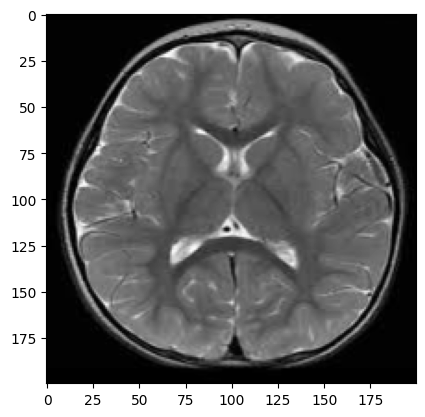

In [65]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [66]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1227, 40000)

### Split Data

In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [68]:
xtrain.shape, xtest.shape

((981, 40000), (246, 40000))

### Feature Scaling

In [69]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [70]:
from sklearn.decomposition import PCA

In [71]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(981, 40000) (246, 40000)


In [72]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Train Model

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [74]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)


LogisticRegression(C=0.1)

In [75]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

### Evaluation

In [76]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9512195121951219


In [77]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9938837920489296
Testing Score: 0.967479674796748


### Prediction

In [78]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 12,  38,  57,  86, 138, 151, 179, 222]),)

In [79]:
pred[36]

0

In [80]:
ytest[36]

0

### TEST MODEL

In [81]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

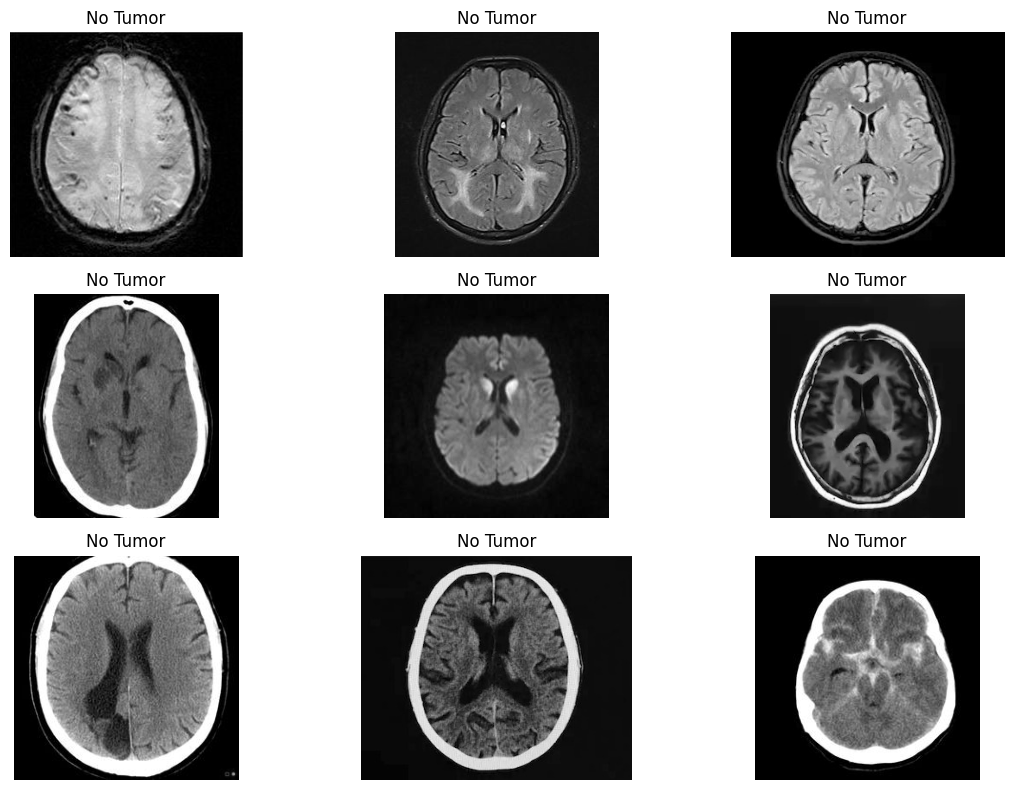

In [82]:
import matplotlib.pyplot as plt
import cv2
import os

plt.figure(figsize=(12, 8))
c = 1

# Loop through the first 9 images in the no_tumor folder
for i in os.listdir('/content/drive/MyDrive/Brain-Tumor-Detection-Using-MRI-Images-main/Testing/no_tumor')[:9]:
    # Corrected file path by adding a slash
    img_path = os.path.join('/content/drive/MyDrive/Brain-Tumor-Detection-Using-MRI-Images-main/Testing/no_tumor', i)
    img = cv2.imread(img_path, 0)

    # Ensure the image was read successfully
    if img is not None:
        img1 = cv2.resize(img, (200, 200))
        img1 = img1.reshape(1, -1) / 255
        p = sv.predict(img1)  # Ensure sv.predict() is defined
        plt.subplot(3, 3, c)
        plt.title(dec[p[0]])  # Ensure dec dictionary is defined
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        c += 1
    else:
        print(f"Failed to read image: {img_path}")

plt.tight_layout()
plt.show()


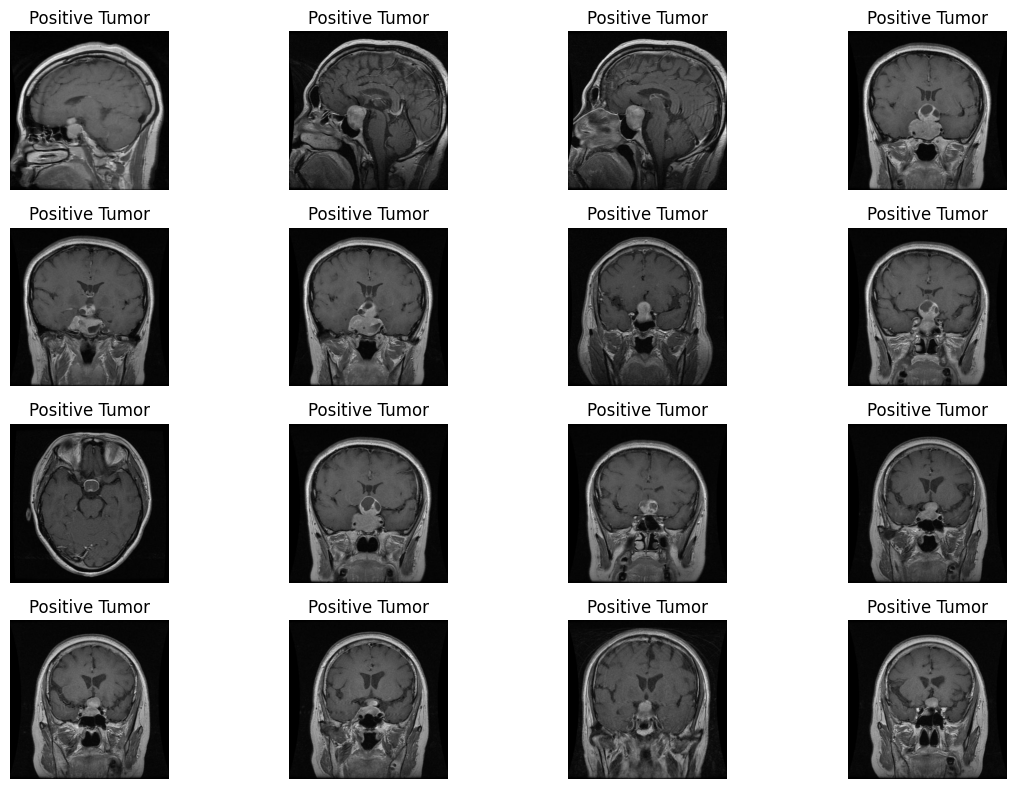

In [83]:
import matplotlib.pyplot as plt
import cv2
import os

plt.figure(figsize=(12, 8))
c = 1

# Loop through the first 16 images in the pituitary_tumor folder
for i in os.listdir('/content/drive/MyDrive/Brain-Tumor-Detection-Using-MRI-Images-main/Testing/tumor')[:16]:
    # Corrected file path by adding a slash
    img_path = os.path.join('/content/drive/MyDrive/Brain-Tumor-Detection-Using-MRI-Images-main/Testing/tumor', i)
    img = cv2.imread(img_path, 0)

    # Ensure the image was read successfully
    if img is not None:
        img1 = cv2.resize(img, (200, 200))
        img1 = img1.reshape(1, -1) / 255
        p = sv.predict(img1)  # Ensure sv.predict() is defined
        plt.subplot(4, 4, c)
        plt.title(dec[p[0]])  # Ensure dec dictionary is defined
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        c += 1
    else:
        print(f"Failed to read image: {img_path}")

plt.tight_layout()
plt.show()


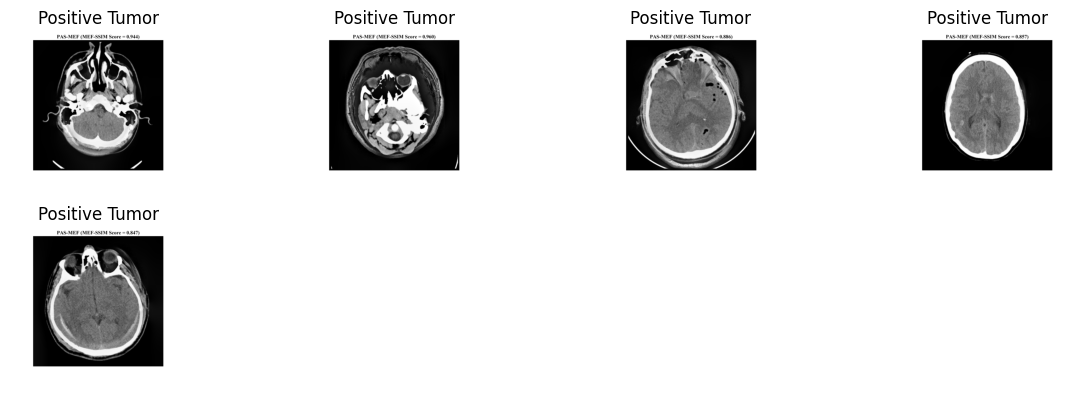

In [84]:
import matplotlib.pyplot as plt
import cv2
import os

plt.figure(figsize=(12, 8))
c = 1

# Loop through the first 16 images in the pituitary_tumor folder
for i in os.listdir('/content/drive/MyDrive/Brain-Tumor-Detection-Using-MRI-Images-main/Testing/fusion')[:5]:
    # Corrected file path by adding a slash
    img_path = os.path.join('/content/drive/MyDrive/Brain-Tumor-Detection-Using-MRI-Images-main/Testing/fusion', i)
    img = cv2.imread(img_path, 0)

    # Ensure the image was read successfully
    if img is not None:
        img1 = cv2.resize(img, (200, 200))
        img1 = img1.reshape(1, -1) / 255
        p = sv.predict(img1)  # Ensure sv.predict() is defined
        plt.subplot(4, 4, c)
        plt.title(dec[p[0]])  # Ensure dec dictionary is defined
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        c += 1
    else:
        print(f"Failed to read image: {img_path}")

plt.tight_layout()
plt.show()
